## 위쟈오구 아기 울음 인식 데이터 세트

데이터에 대한 특별한 설명은 없으나 각각의 wav의 정보를 담고있는 json 파일이 쌍을 이루어 제공된다. 

json 파일에는 각각의 라벨이 명시되어 있다.

silance 라벨은 말 그대로 조용한 배경 소리를 담고 있다. 불필요한 데이터셋이라 판단하여 제외하는 것도 고려해보자.

데이터셋은 아래 홈페이지에서 다운 받을 수 있다.

https://aistudio.baidu.com/aistudio/datasetdetail/169602

In [6]:
# Load packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
from shutil import move
import matplotlib.pyplot as plt
from json import load

In [4]:
# load variables
%store -r main_path data_path csv_path

main_path = main_path
data_path = data_path
csv_path = csv_path

origin_file_path = "/Users/jaewone/Downloads/DatasetId_205704_1663556775"

In [22]:
# extract data from json
file_list = []
state_list = []

for file in os.listdir(origin_file_path):
    file_name, ex = file.rsplit('.', 1)
    if ex == 'json':
        with open(os.path.join(origin_file_path, file)) as f:
            state = load(f)['labels'][0]['name']
            wav_file_path = f'{origin_file_path}/{file_name}.wav'
            if state != '' and os.path.exists(wav_file_path):
                file_list.append(wav_file_path)
                state_list.append(state)

In [30]:
# Create dataframe

df = pd.DataFrame(list(zip(file_list, state_list)), columns=['file', 'state'])

df['source'] = 'wojiaoguodekai'
df['gender'] = df['age'] = df['detail'] = ''
df.tail(3)

,file,state,source,gender,age,detail
863,/Users/jaewone/Downloads/DatasetId_205704_1663...,sleepy,wojiaoguodekai,,,
864,/Users/jaewone/Downloads/DatasetId_205704_1663...,hug,wojiaoguodekai,,,
865,/Users/jaewone/Downloads/DatasetId_205704_1663...,hug,wojiaoguodekai,,,


In [31]:
# move file to data folder
def move_all_file_in_folder(from_path, to_path, extension=None):
  for (path, dirs, files) in os.walk(from_path):
    for dir in dirs:
      move_all_file_in_folder(os.path.join(from_path, dir), to_path, extension)
    for file in files:
      if extension:
        s = file.rsplit('.', 1)
        if len(s) == 1 or f'.{s[1]}' not in extension:
          continue
      move(os.path.join(path, file), os.path.join(to_path, file))

move_all_file_in_folder(origin_file_path, data_path, extension=['.wav'])

In [32]:
# update file path
df['file'] = df['file'].str.replace(f'{origin_file_path}/', '')
df.tail(3)

,file,state,source,gender,age,detail
863,881.wav,sleepy,wojiaoguodekai,,,
864,182.wav,hug,wojiaoguodekai,,,
865,478.wav,hug,wojiaoguodekai,,,


In [33]:
# Append to csv
origin_df = pd.read_csv(csv_path, index_col=0).fillna('')
origin_df = pd.concat([origin_df, df])
origin_df = origin_df.reset_index(drop=True)

# Update csv
origin_df.to_csv(csv_path)
origin_df.tail(3)

,state,gender,age,source,file,detail,duration
2767,sleepy,,,wojiaoguodekai,881.wav,,NaN
2768,hug,,,wojiaoguodekai,182.wav,,NaN
2769,hug,,,wojiaoguodekai,478.wav,,NaN


state 에 따른 파일의 개수와 비율
hug        state exists in 17.90% of   155 files.
hungry     state exists in 15.70% of   136 files.
sleepy     state exists in 15.36% of   133 files.
awake      state exists in 13.86% of   120 files.
diaper     state exists in 13.16% of   114 files.
uncomfortable state exists in 12.24% of   106 files.
silence    state exists in 11.78% of   102 files.


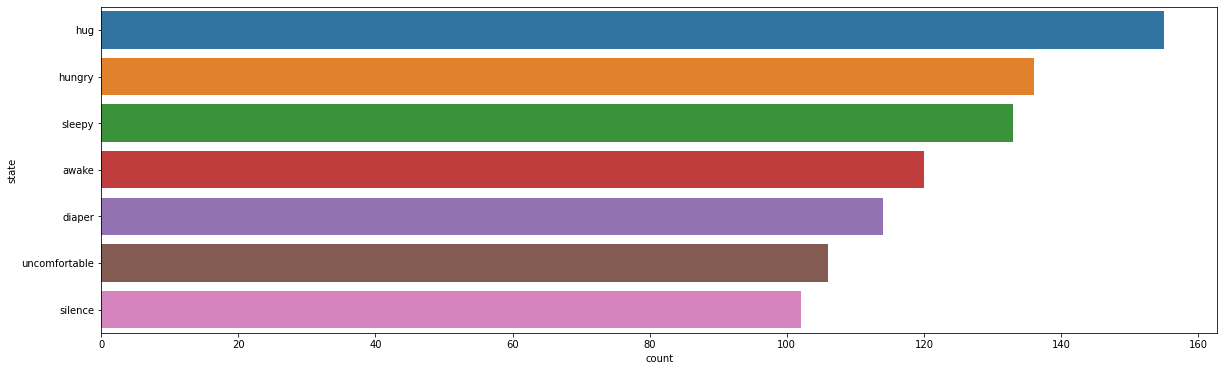

In [34]:
def print_category_info(category: str, sub=None):
    print(f"{category} 에 따른 파일의 개수와 비율")
    value_counts = df[category].value_counts()
    keys = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    rates = list(df[category].value_counts(normalize=True).values)

    for i in range(len(keys)):
        print(f"{keys[i]:10s} state exists in {rates[i]*100:05.2f}% of {counts[i]:5d} files.")

    fig, ax = plt.subplots(figsize=(20, 6))
    sns.countplot(y=category, 
                data=df,
                order=keys,
                hue=sub,
                dodge=False)

print_category_info('state')